### Problem Statement

    Identify products at risk of backorder before the event occurs so that business has time to react.

### What is a Backorder?
    Backorders are products that are temporarily out of stock, but a customer is permitted to place an order against future inventory. A backorder generally indicates that customer demand for a product or service exceeds a company’s capacity to supply it. Back orders are both good and bad. Strong demand can drive back orders, but so can suboptimal planning.

### Data

Data file contains the historical data for the 8 weeks prior to the week we are trying to predict. The data was taken as weekly snapshots at the start of each week. Columns are defined as follows:

    sku - Random ID for the product

    national_inv - Current inventory level for the part

    lead_time - Transit time for product (if available)

    in_transit_qty - Amount of product in transit from source

    forecast_3_month - Forecast sales for the next 3 months

    forecast_6_month - Forecast sales for the next 6 months

    forecast_9_month - Forecast sales for the next 9 months

    sales_1_month - Sales quantity for the prior 1 month time period

    sales_3_month - Sales quantity for the prior 3 month time period

    sales_6_month - Sales quantity for the prior 6 month time period

    sales_9_month - Sales quantity for the prior 9 month time period

    min_bank - Minimum recommend amount to stock

    potential_issue - Source issue for part identified

    pieces_past_due - Parts overdue from source

    perf_6_month_avg - Source performance for prior 6 month period

    perf_12_month_avg - Source performance for prior 12 month period

    local_bo_qty - Amount of stock orders overdue

    deck_risk - Part risk flag

    oe_constraint - Part risk flag

    ppap_risk - Part risk flag

    stop_auto_buy - Part risk flag

    rev_stop - Part risk flag

    went_on_backorder - Product actually went on backorder. This is the target value.

#### Identify Right Error Metrics

    Based on the business, identify right error metrics.

### Data Pre-processing
#### Loading the required libraries

In [1]:
import numpy as np
import pandas as pd
import os

Get current working directory

In [2]:
PATH = os.getcwd()

Change directory

In [3]:
os.chdir(PATH)

#### Loading the data

In [4]:
#Load the Data - Backorders.csv
data = pd.read_csv('BackOrders.csv', na_values=[-99])
data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,NaN,NaN,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46,2.0,0,0,0,0,1,2,6,...,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2,2.0,0,4,6,10,2,2,5,...,0,0.97,0.92,0,No,No,No,Yes,No,No


#### Understand the Data

See the number row and columns

In [5]:
data.shape

(61589, 23)

Display the columns

In [6]:
print(data.columns)
print(data.dtypes)

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')
sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
pp

See the top rows of the data

In [7]:
data.head(10)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,NaN,NaN,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46,2.0,0,0,0,0,1,2,6,...,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2,2.0,0,4,6,10,2,2,5,...,0,0.97,0.92,0,No,No,No,Yes,No,No
5,3002608,297,12.0,0,0,0,0,5,6,44,...,0,0.58,0.75,0,Yes,No,No,Yes,No,No
6,1707693,3285,8.0,0,0,0,0,18,81,162,...,0,0.61,0.57,0,No,No,No,Yes,No,No
7,2066128,6,2.0,0,0,3,9,1,5,8,...,0,0.86,0.77,0,No,No,No,Yes,No,Yes
8,3174990,99,8.0,0,46,169,225,2,22,176,...,0,0.11,0.37,0,No,No,No,Yes,No,No
9,3021709,52,2.0,0,0,0,0,0,0,0,...,0,0.83,0.69,0,No,No,No,Yes,No,No


Shows a quick statistic summary of your data using describe.

    For object data (e.g. strings or timestamps), the result’s index will include count, unique, top, and freq. 

        The top is the most common value.

        The freq is the most common value’s frequency.

In [8]:
data.describe(include='all')

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,6.158900e+04,61589.000000,58186.000000,61589.000000,6.158900e+04,6.158900e+04,6.158900e+04,61589.000000,61589.000000,6.158900e+04,...,61589.000000,57248.000000,57498.000000,61589.000000,61589,61589,61589,61589,61589,61589
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,No,No,Yes,No,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,48145,61577,53792,59303,61569,50296
mean,2.037188e+06,287.721882,7.559619,30.192843,1.692728e+02,3.150413e+02,4.535760e+02,44.742957,150.732631,2.835465e+02,...,1.605400,0.767787,0.763014,1.205361,NaN,NaN,NaN,NaN,NaN,NaN
std,6.564178e+05,4233.906931,6.498952,792.869253,5.286742e+03,9.774362e+03,1.420201e+04,1373.805831,5224.959649,8.872270e+03,...,42.309229,0.251166,0.243469,29.981155,NaN,NaN,NaN,NaN,NaN,NaN
min,1.068628e+06,-2999.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.498574e+06,3.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.680000,0.680000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.898033e+06,10.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000,4.000000e+00,...,0.000000,0.840000,0.820000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.314826e+06,57.000000,8.000000,0.000000,1.200000e+01,2.500000e+01,3.600000e+01,6.000000,17.000000,3.400000e+01,...,0.000000,0.970000,0.950000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


Display data type of each variable

In [9]:
data.dtypes

sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

#### Observations

    sku is Categorical but is interpreted as int64 

    potential_issue, deck_risk, oe_constraint, ppap_risk, stop_auto_buy, rev_stop, and went_on_backorder are categorical but are interpreted as object. 

#### Convert all the attributes to appropriate type

Data type conversion

    Using astype('category') to convert potential_issue, deck_risk, oe_constraint, ppap_risk, stop_auto_buy, rev_stop, and went_on_backorder attributes to categorical attributes.


In [10]:
data[['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','went_on_backorder']]=\
data[['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','went_on_backorder']].astype('category')
#potential_issue, deck_risk, oe_constraint, ppap_risk, stop_auto_buy, rev_stop, and went_on_backorder

Display data type of each variable

In [11]:
data.dtypes

sku                     int64
national_inv            int64
lead_time             float64
in_transit_qty          int64
forecast_3_month        int64
forecast_6_month        int64
forecast_9_month        int64
sales_1_month           int64
sales_3_month           int64
sales_6_month           int64
sales_9_month           int64
min_bank                int64
potential_issue      category
pieces_past_due         int64
perf_6_month_avg      float64
perf_12_month_avg     float64
local_bo_qty            int64
deck_risk            category
oe_constraint        category
ppap_risk            category
stop_auto_buy        category
rev_stop             category
went_on_backorder    category
dtype: object

##### Delete sku attribute

In [12]:
data.drop('sku', axis=1,inplace=True)

In [13]:
data.dtypes

national_inv            int64
lead_time             float64
in_transit_qty          int64
forecast_3_month        int64
forecast_6_month        int64
forecast_9_month        int64
sales_1_month           int64
sales_3_month           int64
sales_6_month           int64
sales_9_month           int64
min_bank                int64
potential_issue      category
pieces_past_due         int64
perf_6_month_avg      float64
perf_12_month_avg     float64
local_bo_qty            int64
deck_risk            category
oe_constraint        category
ppap_risk            category
stop_auto_buy        category
rev_stop             category
went_on_backorder    category
dtype: object

#### Missing Data

    Missing value analysis and dropping the records with missing values

Observing the number of records before and after missing value records removal

In [14]:
print('Before removing NA values:')
data.isna().sum()

Before removing NA values:


national_inv            0
lead_time            3403
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg     4341
perf_12_month_avg    4091
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

Since the number of missing values is about 5%. For initial analysis we ignore all these records

In [15]:
data.dropna(inplace=True)
print('After removing NA values:')
data.isna().sum()

After removing NA values:


national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

#### Converting Categorical to Numeric

For some of the models all the independent attribute should be of type numeric and ANN model is one among them.
But this data set has some categorial attributes.

'pandas.get_dummies' To convert convert categorical variable into dummy/indicator variables


##### Creating dummy variables.

If we have k levels in a category, then we create k-1 dummy variables as the last one would be redundant. So we use the parameter drop_first in pd.get_dummies function that drops the first level in each of the category


In [16]:
data = pd.get_dummies(data, columns=['potential_issue','deck_risk','oe_constraint','ppap_risk',
                                     'stop_auto_buy','rev_stop','went_on_backorder'], drop_first=True)
print(data.dtypes)
data.head()

national_inv               int64
lead_time                float64
in_transit_qty             int64
forecast_3_month           int64
forecast_6_month           int64
forecast_9_month           int64
sales_1_month              int64
sales_3_month              int64
sales_6_month              int64
sales_9_month              int64
min_bank                   int64
pieces_past_due            int64
perf_6_month_avg         float64
perf_12_month_avg        float64
local_bo_qty               int64
potential_issue_Yes        uint8
deck_risk_Yes              uint8
oe_constraint_Yes          uint8
ppap_risk_Yes              uint8
stop_auto_buy_Yes          uint8
rev_stop_Yes               uint8
went_on_backorder_Yes      uint8
dtype: object


,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
1,7,2.0,0,0,0,0,0,0,0,0,...,0.50,0.28,0,0,1,0,0,1,0,0
2,258,15.0,10,10,77,184,46,132,256,365,...,0.54,0.70,0,0,0,0,0,1,0,0
3,46,2.0,0,0,0,0,1,2,6,9,...,0.75,0.90,0,0,1,0,0,1,0,0
4,2,2.0,0,4,6,10,2,2,5,6,...,0.97,0.92,0,0,0,0,0,1,0,0
5,297,12.0,0,0,0,0,5,6,44,57,...,0.58,0.75,0,0,1,0,0,1,0,0


#### Target attribute distribution

In [17]:
data.went_on_backorder_Yes.value_counts()*100/data.went_on_backorder_Yes.count()

0    81.024665
1    18.975335
Name: went_on_backorder_Yes, dtype: float64

#### Train-Test Split

Using sklearn.model_selection.train_test_split

    Split arrays or matrices into train and test subsets

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[data.columns.difference(['went_on_backorder_Yes'])],
                                                   data['went_on_backorder_Yes'], test_size=0.3,
                                                   random_state=123, stratify = data['went_on_backorder_Yes'],
                                                   shuffle=True)

### Perceptron Model

In [19]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [20]:
perceptron_model = Sequential()

perceptron_model.add(Dense(1, input_dim=21, activation='sigmoid', kernel_initializer='normal'))

In [21]:
perceptron_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Note:
# For multi-class classification use loss = 'categorical_crossentropy' and metrics = 'categorical_accuracy'
# Even if you use "binary_crossentropy" as loss, use metrics = 'categorical_accuracy' for multi-class

# Why? Because:
# Keras does not define a single accuracy metric, but several different ones, among them binary_accuracy and 
# categorical_accuracy. What happens under the hood is that, since you have selected binary cross entropy as
# your loss function and have not specified a particular accuracy metric, Keras (wrongly...) infers that you
# are interested in the binary_accuracy, and this is what it returns - while in fact you are interested in 
# the categorical_accuracy.

In [22]:
perceptron_model_history = perceptron_model.fit(X_train, y_train, epochs=10, batch_size=64,
                                               validation_split=0.2,use_multiprocessing=True) #shuffle=True

Train on 32058 samples, validate on 8015 samples
Epoch 1/10
32058/32058 [==============================] - 1s 23us/step - loss: 1494.3274 - accuracy: 0.8069 - val_loss: 179.7598 - val_accuracy: 0.8099
Epoch 2/10
32058/32058 [==============================] - 1s 23us/step - loss: 1345.5779 - accuracy: 0.8267 - val_loss: 1932.6475 - val_accuracy: 0.7647
Epoch 3/10
32058/32058 [==============================] - 1s 22us/step - loss: 4446.7124 - accuracy: 0.7974 - val_loss: 1607.7090 - val_accuracy: 0.8050
Epoch 4/10
32058/32058 [==============================] - 1s 20us/step - loss: 2647.5053 - accuracy: 0.8000 - val_loss: 403.7133 - val_accuracy: 0.8399
Epoch 5/10
32058/32058 [==============================] - 1s 19us/step - loss: 1624.6081 - accuracy: 0.8129 - val_loss: 167.3338 - val_accuracy: 0.8478
Epoch 6/10
32058/32058 [==============================] - 1s 20us/step - loss: 3037.5554 - accuracy: 0.8214 - val_loss: 4821.1001 - val_accuracy: 0.7654
Epoch 7/10
32058/32058 [============

##### Plot

In [23]:
print(perceptron_model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [24]:
import matplotlib.pyplot as plt

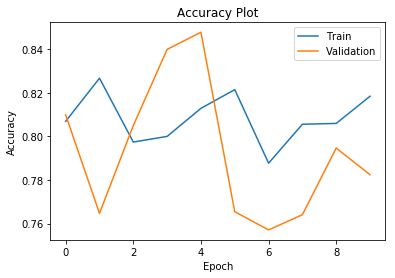

In [25]:
plt.plot(perceptron_model_history.history['accuracy'])
plt.plot(perceptron_model_history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

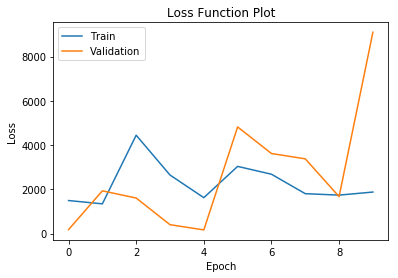

In [26]:
plt.plot(perceptron_model_history.history['loss'])
plt.plot(perceptron_model_history.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [27]:
# Get Model Summary:

print(perceptron_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 22        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None


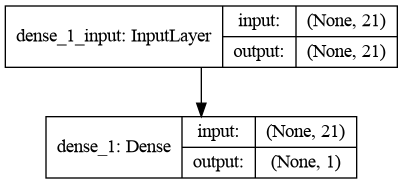

In [28]:
# Vizualize the model:

from keras.utils.vis_utils import plot_model

plot_model(perceptron_model, to_file='perceptron_model.png', show_shapes=True, show_layer_names=True) # to_file='model_plot.png'

##### Predictions

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
test_pred = perceptron_model.predict_classes(X_test)
train_pred = perceptron_model.predict_classes(X_train)

confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

[[31471   998]
 [ 7522    82]]
[[13483   433]
 [ 3228    31]]


##### Train Test Accuracy, True Negative Rate and True Positive Rate

In [31]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

print("-----------------------")

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Train TNR:  0.969262989312883
Train TPR:  0.010783798001052078
Train Accuracy:  0.7873880168692137
-----------------------
Test TNR:  0.968884736993389
Test TPR:  0.009512120282295183
Test Accuracy:  0.7868413391557496


### MLP with 2 layers

    1 hidden layer with 15 neurons

Train on 32058 samples, validate on 8015 samples
Epoch 1/10
32058/32058 [==============================] - 1s 30us/step - loss: 0.3196 - accuracy: 0.8497 - val_loss: 0.3069 - val_accuracy: 0.8477
Epoch 2/10
32058/32058 [==============================] - 1s 27us/step - loss: 0.2963 - accuracy: 0.8695 - val_loss: 0.2893 - val_accuracy: 0.8845
Epoch 3/10
32058/32058 [==============================] - 1s 27us/step - loss: 0.3062 - accuracy: 0.8560 - val_loss: 0.3020 - val_accuracy: 0.8827
Epoch 4/10
32058/32058 [==============================] - 1s 31us/step - loss: 0.3048 - accuracy: 0.8612 - val_loss: 0.2924 - val_accuracy: 0.8833
Epoch 5/10
32058/32058 [==============================] - 1s 27us/step - loss: 0.2874 - accuracy: 0.8759 - val_loss: 0.2937 - val_accuracy: 0.8801
Epoch 6/10
32058/32058 [==============================] - 1s 32us/step - loss: 0.2985 - accuracy: 0.8610 - val_loss: 0.2963 - val_accuracy: 0.8720
Epoch 7/10
32058/32058 [==============================] - 1s 25us/ste

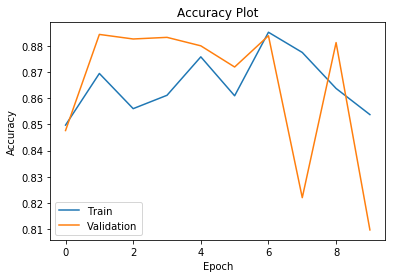

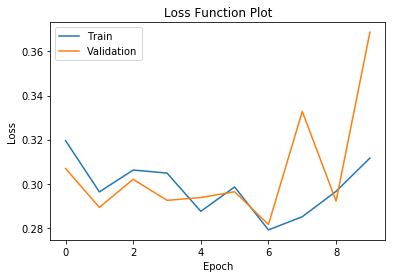

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 15)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________
None


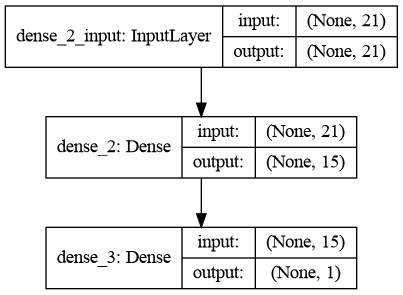

In [32]:
## MLP with 2 layers and 15 neurons:

# Define MLP model:

from keras import initializers

mlp_model_15 = Sequential()

mlp_model_15.add(Dense(15, input_dim=21, activation='tanh', kernel_initializer=initializers.RandomUniform(seed=123)))
mlp_model_15.add(Dense(1, activation='sigmoid'))
mlp_model_15.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


mlp_model_15_history = mlp_model_15.fit(X_train, y_train, epochs=10, batch_size=64,
                                        validation_split=0.2,use_multiprocessing=True)

## Plot:
print(mlp_model_15_history.history.keys())

## Accuracy:
plt.plot(mlp_model_15_history.history['accuracy'])
plt.plot(mlp_model_15_history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

## Loss:
plt.plot(mlp_model_15_history.history['loss'])
plt.plot(mlp_model_15_history.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Get Model Summary:
print(mlp_model_15.summary())

# Vizualize the model:
from keras.utils.vis_utils import plot_model

plot_model(mlp_model_15, to_file='mlp_model_15.png', show_shapes=True, show_layer_names=True) # to_file='model_plot.png'


#### Predictions

#### Getting evaluation metrics and evaluating model performance

#### Calculate Accuracy, True Positive Rate and True Negative Rates

In [33]:
#### Predictions

#### Getting evaluation metrics and evaluating model performance

mlp_test_pred_15 = mlp_model_15.predict_classes(X_test)
mlp_train_pred_15 = mlp_model_15.predict_classes(X_train)

mlp_confusion_matrix_test_15 = confusion_matrix(y_test, mlp_test_pred_15)
mlp_confusion_matrix_train_15 = confusion_matrix(y_train, mlp_train_pred_15)

print(mlp_confusion_matrix_train_15)
print(mlp_confusion_matrix_test_15)


#### Calculate Accuracy, True Positive Rate and True Negative Rates

##### Train Test Accuracy, True Negative Rate and True Positive Rate

mlp_Accuracy_Train_15=(mlp_confusion_matrix_train_15[0,0]+mlp_confusion_matrix_train_15[1,1])/(mlp_confusion_matrix_train_15[0,0]+mlp_confusion_matrix_train_15[0,1]+mlp_confusion_matrix_train_15[1,0]+mlp_confusion_matrix_train_15[1,1])
mlp_TNR_Train_15=mlp_confusion_matrix_train_15[0,0]/(mlp_confusion_matrix_train_15[0,0]+mlp_confusion_matrix_train_15[0,1])
mlp_TPR_Train_15=mlp_confusion_matrix_train_15[1,1]/(mlp_confusion_matrix_train_15[1,0]+mlp_confusion_matrix_train_15[1,1])

print("Train TNR: ",mlp_TNR_Train_15)
print("Train TPR: ",mlp_TPR_Train_15)
print("Train Accuracy: ",mlp_Accuracy_Train_15)

print("-----------------------")

mlp_Accuracy_Test_15=(mlp_confusion_matrix_test_15[0,0]+mlp_confusion_matrix_test_15[1,1])/(mlp_confusion_matrix_test_15[0,0]+mlp_confusion_matrix_test_15[0,1]+mlp_confusion_matrix_test_15[1,0]+mlp_confusion_matrix_test_15[1,1])
mlp_TNR_Test_15= mlp_confusion_matrix_test_15[0,0]/(mlp_confusion_matrix_test_15[0,0] + mlp_confusion_matrix_test_15[0,1])
mlp_TPR_Test_15= mlp_confusion_matrix_test_15[1,1]/(mlp_confusion_matrix_test_15[1,0] + mlp_confusion_matrix_test_15[1,1])

print("Test TNR: ",mlp_TNR_Test_15)
print("Test TPR: ",mlp_TPR_Test_15)
print("Test Accuracy: ",mlp_Accuracy_Test_15)

[[32293   176]
 [ 7318   286]]
[[13828    88]
 [ 3127   132]]
Train TNR:  0.9945794450090856
Train TPR:  0.03761178327196212
Train Accuracy:  0.8129912908941183
-----------------------
Test TNR:  0.9936763437769474
Test TPR:  0.04050322184719239
Test Accuracy:  0.8128093158660844


### MLP with 2 layers

    1 hidden layer with 20 neurons

In [34]:
# Define MLP model:

from keras import initializers

mlp_model = Sequential()

mlp_model.add(Dense(20, input_dim=21, activation='relu', kernel_initializer=initializers.RandomUniform(seed=123)))
mlp_model.add(Dense(1, activation='sigmoid'))
mlp_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [35]:
mlp_model_history = mlp_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2,
                                 use_multiprocessing=True)

Train on 32058 samples, validate on 8015 samples
Epoch 1/10
32058/32058 [==============================] - 1s 27us/step - loss: 0.8505 - accuracy: 0.8091 - val_loss: 0.4009 - val_accuracy: 0.8055
Epoch 2/10
32058/32058 [==============================] - 1s 25us/step - loss: 0.4032 - accuracy: 0.8111 - val_loss: 0.4322 - val_accuracy: 0.8055
Epoch 3/10
32058/32058 [==============================] - 1s 24us/step - loss: 0.4053 - accuracy: 0.8115 - val_loss: 0.4101 - val_accuracy: 0.8055
Epoch 4/10
32058/32058 [==============================] - 1s 25us/step - loss: 0.4527 - accuracy: 0.8115 - val_loss: 0.4039 - val_accuracy: 0.8054
Epoch 5/10
32058/32058 [==============================] - 1s 30us/step - loss: 0.3825 - accuracy: 0.8114 - val_loss: 0.3928 - val_accuracy: 0.8055
Epoch 6/10
32058/32058 [==============================] - 1s 27us/step - loss: 0.3991 - accuracy: 0.8114 - val_loss: 0.4094 - val_accuracy: 0.8055
Epoch 7/10
32058/32058 [==============================] - 1s 25us/ste

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


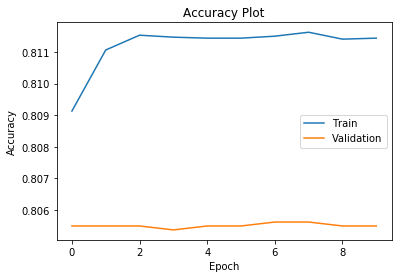

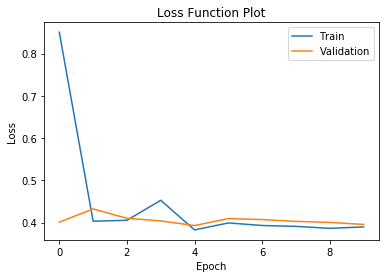

In [36]:
## Plot:
print(mlp_model_history.history.keys())

## Accuracy:
plt.plot(mlp_model_history.history['accuracy'])
plt.plot(mlp_model_history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

## Loss:
plt.plot(mlp_model_history.history['loss'])
plt.plot(mlp_model_history.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [37]:
# Get Model Summary:
print(mlp_model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                440       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None


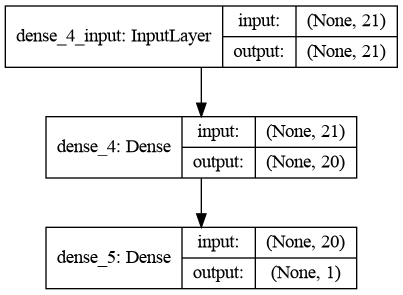

In [38]:
# Vizualize the model:
from keras.utils.vis_utils import plot_model

plot_model(mlp_model, to_file='mlp_model.png', show_shapes=True, show_layer_names=True) # to_file='model_plot.png'

#### Predictions

#### Getting evaluation metrics and evaluating model performance

In [39]:
mlp_test_pred = mlp_model.predict_classes(X_test)
mlp_train_pred = mlp_model.predict_classes(X_train)

mlp_confusion_matrix_test = confusion_matrix(y_test, mlp_test_pred)
mlp_confusion_matrix_train = confusion_matrix(y_train, mlp_train_pred)

print(mlp_confusion_matrix_train)
print(mlp_confusion_matrix_test)


[[32467     2]
 [ 7602     2]]
[[13916     0]
 [ 3258     1]]


#### Calculate Accuracy, True Positive Rate and True Negative Rates

In [40]:
##### Train Test Accuracy, True Negative Rate and True Positive Rate

mlp_Accuracy_Train=(mlp_confusion_matrix_train[0,0]+mlp_confusion_matrix_train[1,1])/(mlp_confusion_matrix_train[0,0]+mlp_confusion_matrix_train[0,1]+mlp_confusion_matrix_train[1,0]+mlp_confusion_matrix_train[1,1])
mlp_TNR_Train=mlp_confusion_matrix_train[0,0]/(mlp_confusion_matrix_train[0,0]+mlp_confusion_matrix_train[0,1])
mlp_TPR_Train=mlp_confusion_matrix_train[1,1]/(mlp_confusion_matrix_train[1,0]+mlp_confusion_matrix_train[1,1])

print("Train TNR: ",mlp_TNR_Train)
print("Train TPR: ",mlp_TPR_Train)
print("Train Accuracy: ",mlp_Accuracy_Train)

print("-----------------------")

mlp_Accuracy_Test=(mlp_confusion_matrix_test[0,0]+mlp_confusion_matrix_test[1,1])/(mlp_confusion_matrix_test[0,0]+mlp_confusion_matrix_test[0,1]+mlp_confusion_matrix_test[1,0]+mlp_confusion_matrix_test[1,1])
mlp_TNR_Test= mlp_confusion_matrix_test[0,0]/(mlp_confusion_matrix_test[0,0] + mlp_confusion_matrix_test[0,1])
mlp_TPR_Test= mlp_confusion_matrix_test[1,1]/(mlp_confusion_matrix_test[1,0] + mlp_confusion_matrix_test[1,1])

print("Test TNR: ",mlp_TNR_Test)
print("Test TPR: ",mlp_TPR_Test)
print("Test Accuracy: ",mlp_Accuracy_Test)

Train TNR:  0.9999384027841941
Train TPR:  0.0002630194634402946
Train Accuracy:  0.8102463005015846
-----------------------
Test TNR:  1.0
Test TPR:  0.0003068425897514575
Test Accuracy:  0.8103056768558952


### MLP with 2 layers

    1 hidden layer with 25 neurons

In [41]:
mlp25 = Sequential()

mlp25.add(Dense(25, input_dim=21, activation='sigmoid', kernel_initializer=initializers.RandomUniform(seed=351)))
mlp25.add(Dense(1, activation='sigmoid'))
mlp25.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [42]:
mlp25_hist = mlp25.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2,
                      use_multiprocessing=True, shuffle=True)

Train on 32058 samples, validate on 8015 samples
Epoch 1/10
32058/32058 [==============================] - 1s 28us/step - loss: 0.3396 - accuracy: 0.8415 - val_loss: 0.3017 - val_accuracy: 0.8689
Epoch 2/10
32058/32058 [==============================] - 1s 31us/step - loss: 0.2973 - accuracy: 0.8678 - val_loss: 0.3049 - val_accuracy: 0.8520
Epoch 3/10
32058/32058 [==============================] - 1s 30us/step - loss: 0.2809 - accuracy: 0.8813 - val_loss: 0.2860 - val_accuracy: 0.8761
Epoch 4/10
32058/32058 [==============================] - 1s 25us/step - loss: 0.2811 - accuracy: 0.8802 - val_loss: 0.2813 - val_accuracy: 0.8837
Epoch 5/10
32058/32058 [==============================] - 1s 27us/step - loss: 0.2754 - accuracy: 0.8843 - val_loss: 0.2745 - val_accuracy: 0.8925
Epoch 6/10
32058/32058 [==============================] - 1s 32us/step - loss: 0.2807 - accuracy: 0.8833 - val_loss: 0.2851 - val_accuracy: 0.8816
Epoch 7/10
32058/32058 [==============================] - 1s 28us/ste

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


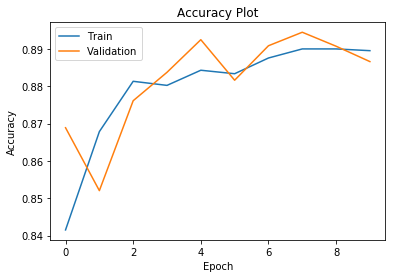

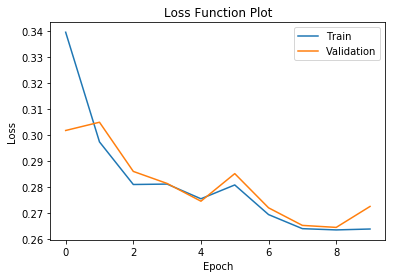

In [43]:
## Plot:

print(mlp25_hist.history.keys())

## Accuracy:

plt.plot(mlp25_hist.history['accuracy'])
plt.plot(mlp25_hist.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

## Loss:

plt.plot(mlp25_hist.history['loss'])
plt.plot(mlp25_hist.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

In [44]:
mlp25.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 25)                550       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 26        
Total params: 576
Trainable params: 576
Non-trainable params: 0
_________________________________________________________________


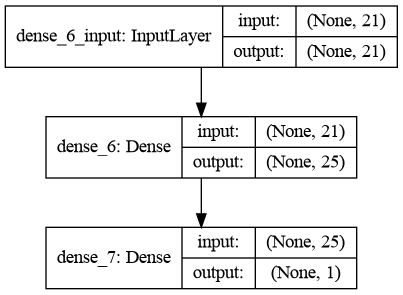

In [45]:
plot_model(mlp25, to_file="MLP_25_Neuron.png", show_layer_names=True, show_shapes=True)

#### Predictions

#### Getting evaluation metrics and evaluating model performance

In [46]:
mlp25_test_pred = mlp25.predict_classes(X_test)
mlp25_train_pred = mlp25.predict_classes(X_train)

mlp25_confusion_matrix_test = confusion_matrix(y_test, mlp25_test_pred)
mlp25_confusion_matrix_train = confusion_matrix(y_train, mlp25_train_pred)

print("Confusion Matrix for Train Data:")
print(mlp25_confusion_matrix_train)
print("Confusion Matrix for Test Data:")
print(mlp25_confusion_matrix_test)


Confusion Matrix for Train Data:
[[30817  1652]
 [ 2922  4682]]
Confusion Matrix for Test Data:
[[13250   666]
 [ 1288  1971]]


#### Calculate Accuracy, True Positive Rate and True Negative Rates

Observation:

    Based on the TPR, 2 layer MLP with 25 nodes hidden layer is best

In [47]:
##### Train Test Accuracy, True Negative Rate and True Positive Rate

mlp25_Accuracy_Train = (mlp25_confusion_matrix_train[0,0]+
                        mlp25_confusion_matrix_train[1,1])/(
                        mlp25_confusion_matrix_train[0,0]+
                        mlp25_confusion_matrix_train[0,1]+
                        mlp25_confusion_matrix_train[1,0]+
                        mlp25_confusion_matrix_train[1,1])
    
mlp25_TNR_Train = mlp25_confusion_matrix_train[0,0]/(
                    mlp25_confusion_matrix_train[0,0]+
                    mlp25_confusion_matrix_train[0,1])

mlp25_TPR_Train = mlp25_confusion_matrix_train[1,1]/(
                    mlp25_confusion_matrix_train[1,0]+
                    mlp25_confusion_matrix_train[1,1])

print("Train TNR: ",mlp25_TNR_Train)
print("Train TPR: ",mlp25_TPR_Train)
print("Train Accuracy: ",mlp25_Accuracy_Train)

print("-----------------------")

mlp25_Accuracy_Test = (mlp25_confusion_matrix_test[0,0]+
                        mlp25_confusion_matrix_test[1,1])/(
                        mlp25_confusion_matrix_test[0,0]+
                        mlp25_confusion_matrix_test[0,1]+
                        mlp25_confusion_matrix_test[1,0]+
                        mlp25_confusion_matrix_test[1,1])
    
mlp25_TNR_Test = mlp25_confusion_matrix_test[0,0]/(
                    mlp25_confusion_matrix_test[0,0]+
                    mlp25_confusion_matrix_test[0,1])

mlp25_TPR_Test = mlp25_confusion_matrix_test[1,1]/(
                    mlp25_confusion_matrix_test[1,0]+
                    mlp25_confusion_matrix_test[1,1])

print("Test TNR: ",mlp25_TNR_Test)
print("Test TPR: ",mlp25_TPR_Test)
print("Test Accuracy: ",mlp25_Accuracy_Test)


Train TNR:  0.9491206997443715
Train TPR:  0.6157285639137297
Train Accuracy:  0.885858308586829
-----------------------
Test TNR:  0.952141419948261
Test TPR:  0.6047867444001227
Test Accuracy:  0.8862299854439593


### MLP with 3 layers

    1st hidden layer with 25 neurons
    2nd hidden layer with 15 neurons

In [48]:
## MLP with 3 layers: 25 & 15 neurons:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[data.columns.difference(['went_on_backorder_Yes'])],
                                                   data['went_on_backorder_Yes'], test_size=0.3,
                                                   random_state=123, stratify = data['went_on_backorder_Yes'],
                                                   shuffle=True)

# Define MLP model:

from keras import initializers
from keras.layers.advanced_activations import LeakyReLU

mlp_model_3 = Sequential()
mlp_model_3.add(Dense(25, input_dim=21, activation='relu', kernel_initializer=initializers.RandomUniform(seed=351)))
mlp_model_3.add(Dense(15))
mlp_model_3.add(LeakyReLU(alpha=0.09))
mlp_model_3.add(Dense(1, activation='sigmoid'))
mlp_model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


mlp_model_3_history = mlp_model_3.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, use_multiprocessing=True)


Train on 32058 samples, validate on 8015 samples
Epoch 1/10
32058/32058 [==============================] - 1s 40us/step - loss: 0.8358 - accuracy: 0.8228 - val_loss: 1.0130 - val_accuracy: 0.8089
Epoch 2/10
32058/32058 [==============================] - 1s 26us/step - loss: 0.5337 - accuracy: 0.8580 - val_loss: 0.3580 - val_accuracy: 0.8852
Epoch 3/10
32058/32058 [==============================] - 1s 26us/step - loss: 0.6029 - accuracy: 0.8691 - val_loss: 0.8109 - val_accuracy: 0.8719
Epoch 4/10
32058/32058 [==============================] - 1s 26us/step - loss: 0.3672 - accuracy: 0.8765 - val_loss: 0.3538 - val_accuracy: 0.8890
Epoch 5/10
32058/32058 [==============================] - 1s 26us/step - loss: 0.4199 - accuracy: 0.8817 - val_loss: 2.2060 - val_accuracy: 0.8086
Epoch 6/10
32058/32058 [==============================] - 1s 31us/step - loss: 0.6747 - accuracy: 0.8769 - val_loss: 1.4337 - val_accuracy: 0.8223
Epoch 7/10
32058/32058 [==============================] - 1s 27us/ste

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


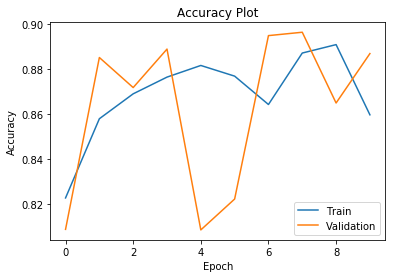

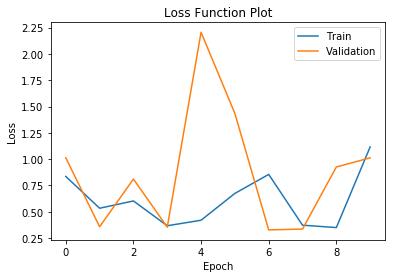

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 25)                550       
_________________________________________________________________
dense_9 (Dense)              (None, 15)                390       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 15)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 16        
Total params: 956
Trainable params: 956
Non-trainable params: 0
_________________________________________________________________
None


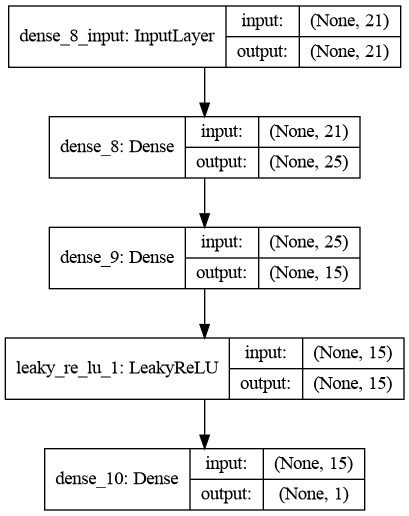

In [49]:
## Plot:
print(mlp_model_3_history.history.keys())

## Accuracy:
plt.plot(mlp_model_3_history.history['accuracy'])
plt.plot(mlp_model_3_history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

## Loss:
plt.plot(mlp_model_3_history.history['loss'])
plt.plot(mlp_model_3_history.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Get Model Summary:
print(mlp_model_3.summary())

# Vizualize the model:
from keras.utils.vis_utils import plot_model

plot_model(mlp_model_3, to_file='mlp_model_3.png', show_shapes=True, show_layer_names=True) # to_file='model_plot.png'


#### Predictions

#### Getting evaluation metrics and evaluating model performance

#### Calculate Accuracy, True Positive Rate and True Negative Rates

Observation:

    Based on the TPR: 3 layer mlp, with 25 nodes in hidden layer 1 and 15 nodes in hidden layer 2 is the best 

In [50]:
#### Predictions

#### Getting evaluation metrics and evaluating model performance

mlp_test_pred_3 = mlp_model_3.predict_classes(X_test)
mlp_train_pred_3 = mlp_model_3.predict_classes(X_train)

mlp_confusion_matrix_test_3 = confusion_matrix(y_test, mlp_test_pred_3)
mlp_confusion_matrix_train_3 = confusion_matrix(y_train, mlp_train_pred_3)

print(mlp_confusion_matrix_train_3)
print(mlp_confusion_matrix_test_3)


#### Calculate Accuracy, True Positive Rate and True Negative Rates

##### Train Test Accuracy, True Negative Rate and True Positive Rate

mlp_Accuracy_Train_3=(mlp_confusion_matrix_train_3[0,0]+mlp_confusion_matrix_train_3[1,1])/(mlp_confusion_matrix_train_3[0,0]+mlp_confusion_matrix_train_3[0,1]+mlp_confusion_matrix_train_3[1,0]+mlp_confusion_matrix_train_3[1,1])
mlp_TNR_Train_3=mlp_confusion_matrix_train_3[0,0]/(mlp_confusion_matrix_train_3[0,0]+mlp_confusion_matrix_train_3[0,1])
mlp_TPR_Train_3=mlp_confusion_matrix_train_3[1,1]/(mlp_confusion_matrix_train_3[1,0]+mlp_confusion_matrix_train_3[1,1])

print("Train TNR: ",mlp_TNR_Train_3)
print("Train TPR: ",mlp_TPR_Train_3)
print("Train Accuracy: ",mlp_Accuracy_Train_3)

print("-----------------------")

mlp_Accuracy_Test_3=(mlp_confusion_matrix_test_3[0,0]+mlp_confusion_matrix_test_3[1,1])/(mlp_confusion_matrix_test_3[0,0]+mlp_confusion_matrix_test_3[0,1]+mlp_confusion_matrix_test_3[1,0]+mlp_confusion_matrix_test_3[1,1])
mlp_TNR_Test_3= mlp_confusion_matrix_test_3[0,0]/(mlp_confusion_matrix_test_3[0,0] + mlp_confusion_matrix_test_3[0,1])
mlp_TPR_Test_3= mlp_confusion_matrix_test_3[1,1]/(mlp_confusion_matrix_test_3[1,0] + mlp_confusion_matrix_test_3[1,1])

print("Test TNR: ",mlp_TNR_Test_3)
print("Test TPR: ",mlp_TPR_Test_3)
print("Test Accuracy: ",mlp_Accuracy_Test_3)

[[30062  2407]
 [ 2104  5500]]
[[12930   986]
 [  946  2313]]
Train TNR:  0.9258677507776648
Train TPR:  0.7233035244608101
Train Accuracy:  0.8874304394480074
-----------------------
Test TNR:  0.9291463064098879
Test TPR:  0.7097269100951212
Test Accuracy:  0.8875109170305677


### MLP with 3 layers

    1st hidden layer with 25 neurons
    2nd hidden layer with 20 neurons

In [51]:
## MLP with 3 layers: 25 & 20 neurons:

# Define MLP model:

from keras import initializers
from keras.layers.advanced_activations import LeakyReLU

mlp_model_25_20 = Sequential()
mlp_model_25_20.add(Dense(25, input_dim=21, activation='relu', kernel_initializer=initializers.RandomUniform(seed=351)))
mlp_model_25_20.add(Dense(20))
mlp_model_25_20.add(LeakyReLU(alpha=0.09))
mlp_model_25_20.add(Dense(1, activation='sigmoid'))
mlp_model_25_20.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


mlp_model_25_20_history = mlp_model_25_20.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, use_multiprocessing=True)


Train on 32058 samples, validate on 8015 samples
Epoch 1/10
32058/32058 [==============================] - 1s 38us/step - loss: 0.5851 - accuracy: 0.8317 - val_loss: 0.3609 - val_accuracy: 0.8749
Epoch 2/10
32058/32058 [==============================] - 1s 38us/step - loss: 0.5049 - accuracy: 0.8673 - val_loss: 0.5630 - val_accuracy: 0.8586
Epoch 3/10
32058/32058 [==============================] - 1s 42us/step - loss: 0.4191 - accuracy: 0.8719 - val_loss: 0.5674 - val_accuracy: 0.8749
Epoch 4/10
32058/32058 [==============================] - 1s 38us/step - loss: 0.5383 - accuracy: 0.8667 - val_loss: 1.2498 - val_accuracy: 0.8303
Epoch 5/10
32058/32058 [==============================] - 1s 30us/step - loss: 0.3914 - accuracy: 0.8746 - val_loss: 0.3267 - val_accuracy: 0.8843
Epoch 6/10
32058/32058 [==============================] - 1s 28us/step - loss: 0.3943 - accuracy: 0.8807 - val_loss: 0.3358 - val_accuracy: 0.8897
Epoch 7/10
32058/32058 [==============================] - 1s 32us/ste

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


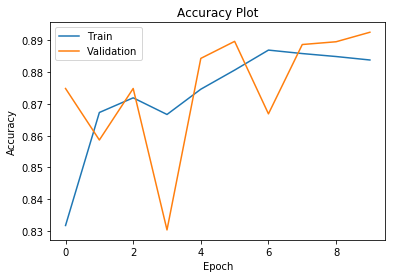

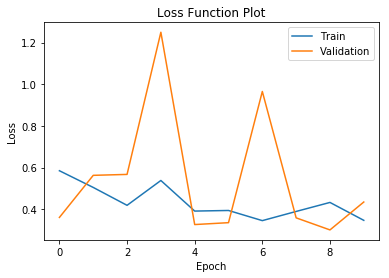

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 25)                550       
_________________________________________________________________
dense_12 (Dense)             (None, 20)                520       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 20)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 21        
Total params: 1,091
Trainable params: 1,091
Non-trainable params: 0
_________________________________________________________________
None


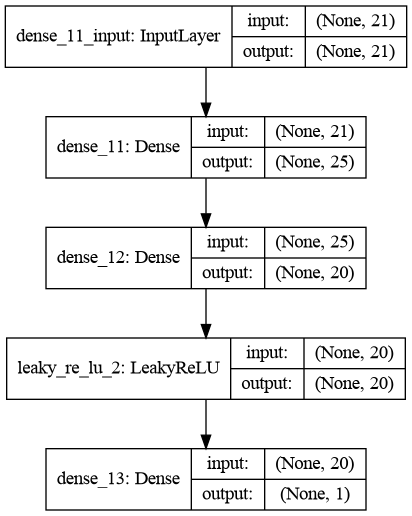

In [52]:
## Plot:
print(mlp_model_25_20_history.history.keys())

## Accuracy:
plt.plot(mlp_model_25_20_history.history['accuracy'])
plt.plot(mlp_model_25_20_history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

## Loss:
plt.plot(mlp_model_25_20_history.history['loss'])
plt.plot(mlp_model_25_20_history.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Get Model Summary:
print(mlp_model_25_20.summary())

# Vizualize the model:
from keras.utils.vis_utils import plot_model

plot_model(mlp_model_25_20, to_file='mlp_model_20_25.png', show_shapes=True, show_layer_names=True) # to_file='model_plot.png'


#### Predictions

#### Getting evaluation metrics and evaluating model performance

#### Calculate Accuracy, True Positive Rate and True Negative Rates

Observation:

    Based on the TPR: 3 layer mlp, with 25 nodes in hidden layer 1 and 15 nodes in hidden layer 2 is the best 

In [53]:
#### Predictions

#### Getting evaluation metrics and evaluating model performance

mlp_test_pred_25_20 = mlp_model_25_20.predict_classes(X_test)
mlp_train_pred_25_20 = mlp_model_25_20.predict_classes(X_train)

mlp_confusion_matrix_test_25_20 = confusion_matrix(y_test, mlp_test_pred_25_20)
mlp_confusion_matrix_train_25_20 = confusion_matrix(y_train, mlp_train_pred_25_20)

print(mlp_confusion_matrix_train_25_20)
print(mlp_confusion_matrix_test_25_20)


#### Calculate Accuracy, True Positive Rate and True Negative Rates

##### Train Test Accuracy, True Negative Rate and True Positive Rate

mlp_Accuracy_Train_25_20=(mlp_confusion_matrix_train_25_20[0,0]+mlp_confusion_matrix_train_25_20[1,1])/(mlp_confusion_matrix_train_25_20[0,0]+mlp_confusion_matrix_train_25_20[0,1]+mlp_confusion_matrix_train_25_20[1,0]+mlp_confusion_matrix_train_25_20[1,1])
mlp_TNR_Train_25_20=mlp_confusion_matrix_train_25_20[0,0]/(mlp_confusion_matrix_train_25_20[0,0]+mlp_confusion_matrix_train_25_20[0,1])
mlp_TPR_Train_25_20=mlp_confusion_matrix_train_25_20[1,1]/(mlp_confusion_matrix_train_25_20[1,0]+mlp_confusion_matrix_train_25_20[1,1])

print("Train TNR: ",mlp_TNR_Train_25_20)
print("Train TPR: ",mlp_TPR_Train_25_20)
print("Train Accuracy: ",mlp_Accuracy_Train_25_20)

print("-----------------------")

mlp_Accuracy_Test_25_20=(mlp_confusion_matrix_test_25_20[0,0]+mlp_confusion_matrix_test_25_20[1,1])/(mlp_confusion_matrix_test_25_20[0,0]+mlp_confusion_matrix_test_25_20[0,1]+mlp_confusion_matrix_test_25_20[1,0]+mlp_confusion_matrix_test_25_20[1,1])
mlp_TNR_Test_25_20= mlp_confusion_matrix_test_25_20[0,0]/(mlp_confusion_matrix_test_25_20[0,0] + mlp_confusion_matrix_test_25_20[0,1])
mlp_TPR_Test_25_20= mlp_confusion_matrix_test_25_20[1,1]/(mlp_confusion_matrix_test_25_20[1,0] + mlp_confusion_matrix_test_25_20[1,1])

print("Test TNR: ",mlp_TNR_Test_25_20)
print("Test TPR: ",mlp_TPR_Test_25_20)
print("Test Accuracy: ",mlp_Accuracy_Test_25_20)

[[30677  1792]
 [ 2650  4954]]
[[13240   676]
 [ 1165  2094]]
Train TNR:  0.9448088946379624
Train TPR:  0.6514992109416097
Train Accuracy:  0.8891522970578694
-----------------------
Test TNR:  0.9514228226501869
Test TPR:  0.6425283829395521
Test Accuracy:  0.8928093158660845


In [54]:
#np.logspace(0.0001,1,8, base=0.5)
#np.logspace(-3,-1,8)
#np.exp(-3)
tpr=[TPR_Test,mlp_TPR_Test_15,mlp_TPR_Test,
     mlp25_TPR_Test,mlp_TPR_Test_3, mlp_TPR_Test_25_20]
print(tpr)
print()

tnr=[TNR_Test,mlp_TNR_Test_15,mlp_TNR_Test,
     mlp25_TNR_Test,mlp_TNR_Test_3, mlp_TNR_Test_25_20]
print(tnr)
print()

models_l = ['Perceptron','MLP_15_neurons','MLP_20_neurons',
            'MLP_25_neurons','MLP_25_15_neurons','MLP_25_20_neurons']

accuracy=[Accuracy_Test, mlp_Accuracy_Test_15,
         mlp_Accuracy_Test, mlp25_Accuracy_Test,
         mlp_Accuracy_Test_3, mlp_Accuracy_Test_25_20]
print(accuracy)


pd.DataFrame(list(zip(models_l, accuracy, tpr, tnr)), 
             columns=(['Model_type','Accuracy','TPR','TNR']))
#pd.DataFrame([accuracy, tpr, tnr]).T

[0.009512120282295183, 0.04050322184719239, 0.0003068425897514575, 0.6047867444001227, 0.7097269100951212, 0.6425283829395521]

[0.968884736993389, 0.9936763437769474, 1.0, 0.952141419948261, 0.9291463064098879, 0.9514228226501869]

[0.7868413391557496, 0.8128093158660844, 0.8103056768558952, 0.8862299854439593, 0.8875109170305677, 0.8928093158660845]


,Model_type,Accuracy,TPR,TNR
0,Perceptron,0.786841,0.009512,0.968885
1,MLP_15_neurons,0.812809,0.040503,0.993676
2,MLP_20_neurons,0.810306,0.000307,1.000000
3,MLP_25_neurons,0.886230,0.604787,0.952141
4,MLP_25_15_neurons,0.887511,0.709727,0.929146
5,MLP_25_20_neurons,0.892809,0.642528,0.951423


## Find best parameter

### Find the best Learning rate

    Using logarithmic scale randomly generate values between 0.0001 to 1 

In [55]:
#l_rate = np.logspace(0.0001,1,8)
#l_rate = 10**(-2.3 * np.random.rand(6))
l_rate = np.logspace(-3,-1,8)
l_rate


array([0.001     , 0.0019307 , 0.00372759, 0.00719686, 0.01389495,
       0.02682696, 0.05179475, 0.1       ])

In [56]:
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV

In [57]:
def tune_l_rate(l_rate=0.01):
    # Create a model:
    tuned_model = Sequential()
    tuned_model.add(Dense(25, input_dim=21, activation='relu', kernel_initializer=initializers.RandomUniform(seed=351)))
    tuned_model.add(Dense(20))
    tuned_model.add(LeakyReLU(alpha=0.09))
    tuned_model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(lr=l_rate)
    
    # Compile Model:
    tuned_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return tuned_model


In [58]:
hist_loss=[]
hist_acc=[]

for l_rate_v in l_rate:
    
    tuned_model = tune_l_rate(l_rate_v)
    
    #Fit the model
    tuned_model_history = tuned_model.fit(X_train, y_train, epochs=1,
                                       batch_size=64, validation_split=0.2,
                                       use_multiprocessing=True)

    
    hist_loss.append(tuned_model_history.history['val_loss'])
    hist_acc.append(tuned_model_history.history['val_accuracy'])

Train on 32058 samples, validate on 8015 samples
Epoch 1/1
32058/32058 [==============================] - 1s 38us/step - loss: 1.1879 - accuracy: 0.8414 - val_loss: 1.7997 - val_accuracy: 0.8658
Train on 32058 samples, validate on 8015 samples
Epoch 1/1
32058/32058 [==============================] - 1s 39us/step - loss: 0.9516 - accuracy: 0.8273 - val_loss: 3.4238 - val_accuracy: 0.8065
Train on 32058 samples, validate on 8015 samples
Epoch 1/1
32058/32058 [==============================] - 1s 36us/step - loss: 7.7896 - accuracy: 0.8411 - val_loss: 2.2151 - val_accuracy: 0.8339
Train on 32058 samples, validate on 8015 samples
Epoch 1/1
32058/32058 [==============================] - 1s 41us/step - loss: 1.1932 - accuracy: 0.8492 - val_loss: 0.4657 - val_accuracy: 0.8643
Train on 32058 samples, validate on 8015 samples
Epoch 1/1
32058/32058 [==============================] - 1s 40us/step - loss: 1.1723 - accuracy: 0.8139 - val_loss: 0.4360 - val_accuracy: 0.8301
Train on 32058 samples, v

In [59]:
# Get the Learning rate and loss Dataframe
loss_l_rate = pd.DataFrame([l_rate, hist_loss, hist_acc]).T  

#Give the coloumn names
loss_l_rate.columns=['l_rate','val_loss','val_accuracy']

#Sort the values and reset the index
loss_l_rate=loss_l_rate.sort_values('val_loss').reset_index().drop('index',axis=1)
loss_l_rate

,l_rate,val_loss,val_accuracy
0,0.026827,[0.3843876900370985],[0.805489718914032]
1,0.1,[0.4122813565725099],[0.805489718914032]
2,0.013895,[0.4359639452385739],[0.8300686478614807]
3,0.0517947,[0.456761069102207],[0.8056144714355469]
4,0.00719686,[0.46572290130205923],[0.8642545342445374]
5,0.001,[1.7996768565119912],[0.8657517433166504]
6,0.00372759,[2.2151219062595464],[0.8339363932609558]
7,0.0019307,[3.4238368456001513],[0.8064878582954407]


#### Build model with the best learning rate

In [60]:
import tensorflow as tf

In [61]:
np.random.seed(123)
tf.random.set_seed(123)

In [62]:
l_tuned_model = Sequential()
l_tuned_model.add(Dense(25, input_dim=21, activation='relu', kernel_initializer=initializers.RandomUniform(seed=351)))
l_tuned_model.add(Dense(20))
l_tuned_model.add(LeakyReLU(alpha=0.09))
l_tuned_model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(lr=0.00719686)
    
# Compile Model:
l_tuned_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [63]:
l_tuned_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 25)                550       
_________________________________________________________________
dense_39 (Dense)             (None, 20)                520       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 20)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 21        
Total params: 1,091
Trainable params: 1,091
Non-trainable params: 0
_________________________________________________________________


In [64]:
l_tuned_model_history = l_tuned_model.fit(X_train, y_train, epochs=100,
                                       batch_size=64, validation_split=0.2,
                                       use_multiprocessing=True)

Train on 32058 samples, validate on 8015 samples
Epoch 1/100
32058/32058 [==============================] - 1s 39us/step - loss: 0.5045 - accuracy: 0.8642 - val_loss: 0.2959 - val_accuracy: 0.8846
Epoch 2/100
32058/32058 [==============================] - 1s 31us/step - loss: 0.3543 - accuracy: 0.8702 - val_loss: 0.3046 - val_accuracy: 0.8803
Epoch 3/100
32058/32058 [==============================] - 1s 28us/step - loss: 0.4871 - accuracy: 0.8514 - val_loss: 0.3505 - val_accuracy: 0.8060
Epoch 4/100
32058/32058 [==============================] - 1s 31us/step - loss: 0.3463 - accuracy: 0.8642 - val_loss: 0.3861 - val_accuracy: 0.8246
Epoch 5/100
32058/32058 [==============================] - 1s 42us/step - loss: 0.3553 - accuracy: 0.8316 - val_loss: 0.3421 - val_accuracy: 0.8398
Epoch 6/100
32058/32058 [==============================] - 1s 33us/step - loss: 0.3704 - accuracy: 0.8506 - val_loss: 0.4262 - val_accuracy: 0.8488
Epoch 7/100
32058/32058 [==============================] - 1s 2

Epoch 56/100
32058/32058 [==============================] - 1s 25us/step - loss: 0.4659 - accuracy: 0.8425 - val_loss: 0.3710 - val_accuracy: 0.8230
Epoch 57/100
32058/32058 [==============================] - 1s 25us/step - loss: 0.3295 - accuracy: 0.8575 - val_loss: 0.3855 - val_accuracy: 0.8251
Epoch 58/100
32058/32058 [==============================] - 1s 25us/step - loss: 0.3323 - accuracy: 0.8406 - val_loss: 0.3551 - val_accuracy: 0.8474
Epoch 59/100
32058/32058 [==============================] - 1s 25us/step - loss: 0.3084 - accuracy: 0.8554 - val_loss: 0.3541 - val_accuracy: 0.8175
Epoch 60/100
32058/32058 [==============================] - 1s 25us/step - loss: 0.3075 - accuracy: 0.8727 - val_loss: 0.3506 - val_accuracy: 0.8492
Epoch 61/100
32058/32058 [==============================] - 1s 25us/step - loss: 0.3686 - accuracy: 0.8545 - val_loss: 0.4154 - val_accuracy: 0.8055
Epoch 62/100
32058/32058 [==============================] - 1s 25us/step - loss: 0.3207 - accuracy: 0.8472

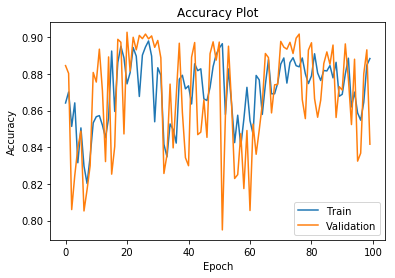

In [65]:
# Plotting Accuracy

plt.plot(l_tuned_model_history.history['accuracy'])
plt.plot(l_tuned_model_history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

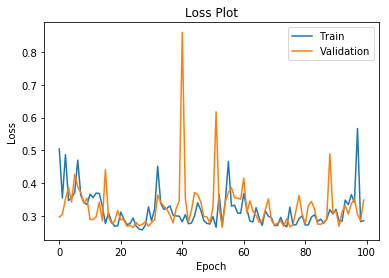

In [66]:
# Plotting Loss

plt.plot(l_tuned_model_history.history['loss'])
plt.plot(l_tuned_model_history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Predictions

In [67]:
train_l_tuned_model = l_tuned_model.predict_classes(X_train)
test_l_tuned_model = l_tuned_model.predict_classes(X_test)

#### Getting evaluation metrics and evaluating model performance

In [68]:
l_confusion_matrix_train = confusion_matrix(y_train, train_l_tuned_model)
l_confusion_matrix_test = confusion_matrix(y_test, test_l_tuned_model)

print(l_confusion_matrix_train)
print(l_confusion_matrix_test)

[[31839   630]
 [ 5554  2050]]
[[13644   272]
 [ 2397   862]]


#### Calculate Accuracy, True Positive Rate and True Negative Rates

In [69]:
Accuracy_Train_l =(l_confusion_matrix_train[0,0]+l_confusion_matrix_train[1,1])/(l_confusion_matrix_train[0,0]+l_confusion_matrix_train[0,1]+l_confusion_matrix_train[1,0]+l_confusion_matrix_train[1,1])
TNR_Train_l = l_confusion_matrix_train[0,0]/(l_confusion_matrix_train[0,0]+l_confusion_matrix_train[0,1])
TPR_Train_l = l_confusion_matrix_train[1,1]/(l_confusion_matrix_train[1,0]+l_confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train_l)
print("Train TPR: ",TPR_Train_l)
print("Train Accuracy: ",Accuracy_Train_l)

print("-----------------------")

Accuracy_Test_l = (l_confusion_matrix_test[0,0]+l_confusion_matrix_test[1,1])/(l_confusion_matrix_test[0,0]+l_confusion_matrix_test[0,1]+l_confusion_matrix_test[1,0]+l_confusion_matrix_test[1,1])
TNR_Test_l = l_confusion_matrix_test[0,0]/(l_confusion_matrix_test[0,0] +l_confusion_matrix_test[0,1])
TPR_Test_l = l_confusion_matrix_test[1,1]/(l_confusion_matrix_test[1,0] +l_confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test_l)
print("Test TPR: ",TPR_Test_l)
print("Test Accuracy: ",Accuracy_Test_l)

print("-----------------------")


Train TNR:  0.9805968770211586
Train TPR:  0.26959495002630196
Train Accuracy:  0.8456816310233823
-----------------------
Test TNR:  0.9804541534923829
Test TPR:  0.2644983123657564
Test Accuracy:  0.8445997088791849
-----------------------


#### Find the best Batch size 

In [70]:
#l_rate = np.logspace(0.0001,1,8)
#l_rate = 10**(-2.3 * np.random.rand(6))
b_size = [32, 64, 128, 256]
b_size

best_l_rate=0.00719686

In [71]:
b_hist_loss=[]
b_hist_acc=[]

for b_size_v in b_size:
    
    #Fit the model
    b_l_tuned_model_history = l_tuned_model.fit(X_train, y_train, epochs=1,
                                       batch_size=b_size_v, validation_split=0.2,
                                       use_multiprocessing=True)

    b_hist_loss.append(b_l_tuned_model_history.history['val_loss'])
    b_hist_acc.append(b_l_tuned_model_history.history['val_accuracy'])

Train on 32058 samples, validate on 8015 samples
Epoch 1/1
32058/32058 [==============================] - 2s 62us/step - loss: 0.3431 - accuracy: 0.8609 - val_loss: 0.3621 - val_accuracy: 0.8624
Train on 32058 samples, validate on 8015 samples
Epoch 1/1
32058/32058 [==============================] - 1s 34us/step - loss: 0.3364 - accuracy: 0.8629 - val_loss: 0.3476 - val_accuracy: 0.8442
Train on 32058 samples, validate on 8015 samples
Epoch 1/1
32058/32058 [==============================] - 1s 17us/step - loss: 0.3349 - accuracy: 0.8566 - val_loss: 0.3251 - val_accuracy: 0.8605
Train on 32058 samples, validate on 8015 samples
Epoch 1/1
32058/32058 [==============================] - 0s 8us/step - loss: 0.3200 - accuracy: 0.8486 - val_loss: 0.3297 - val_accuracy: 0.8397


In [72]:
# Get the Learning rate and loss Dataframe
b_size_t = pd.DataFrame([b_size, b_hist_loss, b_hist_acc]).T  

#Give the coloumn names
b_size_t.columns=['b_size','val_loss','val_accuracy']

#Sort the values and reset the index
b_size_t=b_size_t.sort_values('val_loss').reset_index().drop('index',axis=1)
b_size_t

,b_size,val_loss,val_accuracy
0,128,[0.32510667296401874],[0.8605115413665771]
1,256,[0.32966845308849385],[0.8396756052970886]
2,64,[0.3476190584195233],[0.844167172908783]
3,32,[0.3620794325416265],[0.8623830080032349]


#### Build model with the best batch size

In [73]:
b_l_tuned_model_history = l_tuned_model.fit(X_train, y_train, epochs=100,
                                       batch_size=256, validation_split=0.2,
                                       use_multiprocessing=True)

Train on 32058 samples, validate on 8015 samples
Epoch 1/100
32058/32058 [==============================] - 0s 8us/step - loss: 0.3143 - accuracy: 0.8500 - val_loss: 0.3220 - val_accuracy: 0.8483
Epoch 2/100
32058/32058 [==============================] - 0s 8us/step - loss: 0.3052 - accuracy: 0.8566 - val_loss: 0.3073 - val_accuracy: 0.8574
Epoch 3/100
32058/32058 [==============================] - 0s 8us/step - loss: 0.2933 - accuracy: 0.8649 - val_loss: 0.2925 - val_accuracy: 0.8643
Epoch 4/100
32058/32058 [==============================] - 0s 9us/step - loss: 0.2706 - accuracy: 0.8864 - val_loss: 0.2717 - val_accuracy: 0.8937
Epoch 5/100
32058/32058 [==============================] - 0s 9us/step - loss: 0.2616 - accuracy: 0.8970 - val_loss: 0.2782 - val_accuracy: 0.8925
Epoch 6/100
32058/32058 [==============================] - 0s 8us/step - loss: 0.2620 - accuracy: 0.8950 - val_loss: 0.2685 - val_accuracy: 0.8981
Epoch 7/100
32058/32058 [==============================] - 0s 8us/ste

32058/32058 [==============================] - 0s 8us/step - loss: 0.2551 - accuracy: 0.8938 - val_loss: 0.2793 - val_accuracy: 0.9026
Epoch 57/100
32058/32058 [==============================] - 0s 8us/step - loss: 0.2557 - accuracy: 0.8986 - val_loss: 0.2674 - val_accuracy: 0.9006
Epoch 58/100
32058/32058 [==============================] - 0s 8us/step - loss: 0.2568 - accuracy: 0.8957 - val_loss: 0.2607 - val_accuracy: 0.8968
Epoch 59/100
32058/32058 [==============================] - 0s 8us/step - loss: 0.2463 - accuracy: 0.8996 - val_loss: 0.2695 - val_accuracy: 0.8979
Epoch 60/100
32058/32058 [==============================] - 0s 8us/step - loss: 0.2544 - accuracy: 0.9018 - val_loss: 0.2996 - val_accuracy: 0.8969
Epoch 61/100
32058/32058 [==============================] - 0s 8us/step - loss: 0.2751 - accuracy: 0.8898 - val_loss: 0.2729 - val_accuracy: 0.8949
Epoch 62/100
32058/32058 [==============================] - 0s 8us/step - loss: 0.2543 - accuracy: 0.8994 - val_loss: 0.2654 

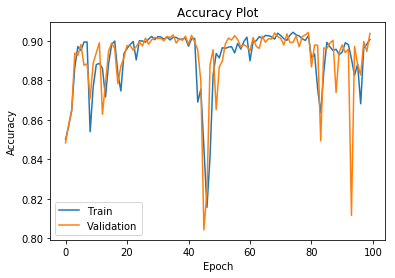

In [74]:
# Plotting Accuracy

plt.plot(b_l_tuned_model_history.history['accuracy'])
plt.plot(b_l_tuned_model_history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

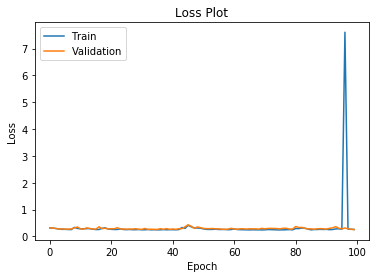

In [75]:
# Plotting Loss

plt.plot(b_l_tuned_model_history.history['loss'])
plt.plot(b_l_tuned_model_history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Predictions

In [76]:
train_b_l_tuned_model = l_tuned_model.predict_classes(X_train)
test_b_l_tuned_model = l_tuned_model.predict_classes(X_test)

#### Getting evaluation metrics and evaluating model performance

In [77]:
b_l_confusion_matrix_train = confusion_matrix(y_train, train_b_l_tuned_model)
b_l_confusion_matrix_test = confusion_matrix(y_test, test_b_l_tuned_model)

print(b_l_confusion_matrix_train)
print(b_l_confusion_matrix_test)

[[30595  1874]
 [ 1979  5625]]
[[13139   777]
 [  868  2391]]


#### Calculate Accuracy, True Positive Rate and True Negative Rates

In [78]:
Accuracy_Train_l_b =(b_l_confusion_matrix_train[0,0]+b_l_confusion_matrix_train[1,1])/(b_l_confusion_matrix_train[0,0]+b_l_confusion_matrix_train[0,1]+b_l_confusion_matrix_train[1,0]+b_l_confusion_matrix_train[1,1])
TNR_Train_l_b = b_l_confusion_matrix_train[0,0]/(b_l_confusion_matrix_train[0,0]+b_l_confusion_matrix_train[0,1])
TNR_Train_l_b = b_l_confusion_matrix_train[1,1]/(b_l_confusion_matrix_train[1,0]+b_l_confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train_l_b)
print("Train TPR: ",TNR_Train_l_b)
print("Train Accuracy: ",Accuracy_Train_l_b)

print("-----------------------")

Accuracy_Test_l_b = (b_l_confusion_matrix_test[0,0]+b_l_confusion_matrix_test[1,1])/(b_l_confusion_matrix_test[0,0]+b_l_confusion_matrix_test[0,1]+b_l_confusion_matrix_test[1,0]+b_l_confusion_matrix_test[1,1])
TNR_Test_l_b = b_l_confusion_matrix_test[0,0]/(b_l_confusion_matrix_test[0,0] +b_l_confusion_matrix_test[0,1])
TPR_Test_l_b = b_l_confusion_matrix_test[1,1]/(b_l_confusion_matrix_test[1,0] +b_l_confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test_l_b)
print("Test TPR: ",TPR_Test_l_b)
print("Test Accuracy: ",Accuracy_Test_l_b)

print("-----------------------")


Train TNR:  0.7397422409258285
Train TPR:  0.7397422409258285
Train Accuracy:  0.9038504728869813
-----------------------
Test TNR:  0.9441649899396378
Test TPR:  0.7336606320957348
Test Accuracy:  0.9042212518195051
-----------------------


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 25)                550       
_________________________________________________________________
dense_39 (Dense)             (None, 20)                520       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 20)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 21        
Total params: 1,091
Trainable params: 1,091
Non-trainable params: 0
_________________________________________________________________
None


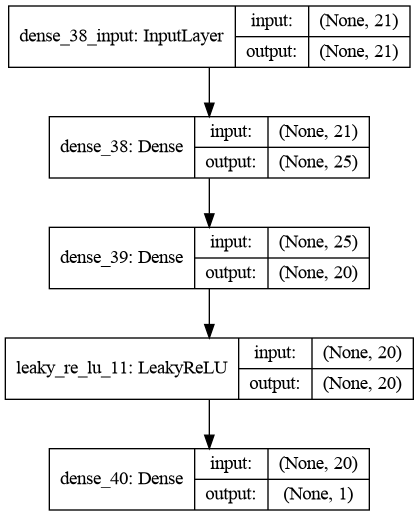

In [79]:
# Get Model Summary:
print(l_tuned_model.summary())

# Vizualize the model:
plot_model(l_tuned_model, to_file='l_tuned_model.png', show_shapes=True, show_layer_names=True) # to_file='model_plot.png'


### Reference Links:

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

https://keras.io/